In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# add the parent directory to the python path in order to be able to import the posCouche module 
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from posCouche.poscouche import poscouche
from posCouche.ic_utils import WEST_toroidal_field, IC_resonance_radius, IC_resonance_frequency

In [3]:
# preset RF frequencies at plant
source_frequencies = [48, 53, 55.5, 57, 63]

R0 = 2.5 # m
a = 0.5 # m

Itors = np.linspace(600, 1350, 101) # A
# Itor -> Bt at R0, Low and High field sides (R = R0 +/- a)
Bt_R0s = WEST_toroidal_field(Itors, R=R0) 
Bt_LFS = WEST_toroidal_field(Itors, R=R0+a) 
Bt_HFS = WEST_toroidal_field(Itors, R=R0-a) 

f_cis_1H = np.asarray([IC_resonance_frequency(Bt_HFS, species='1H'), 
                       IC_resonance_frequency(Bt_R0s, species='1H'), 
                       IC_resonance_frequency(Bt_LFS, species='1H')])

f_cis_H2 = 2*np.asarray([IC_resonance_frequency(Bt_HFS, species='H'), 
                       IC_resonance_frequency(Bt_R0s, species='H'), 
                       IC_resonance_frequency(Bt_LFS, species='H')])

f_cis_He3 = np.asarray([IC_resonance_frequency(Bt_HFS, species='3He'), 
                       IC_resonance_frequency(Bt_R0s, species='3He'), 
                       IC_resonance_frequency(Bt_LFS, species='3He')])

<IPython.core.display.Javascript object>


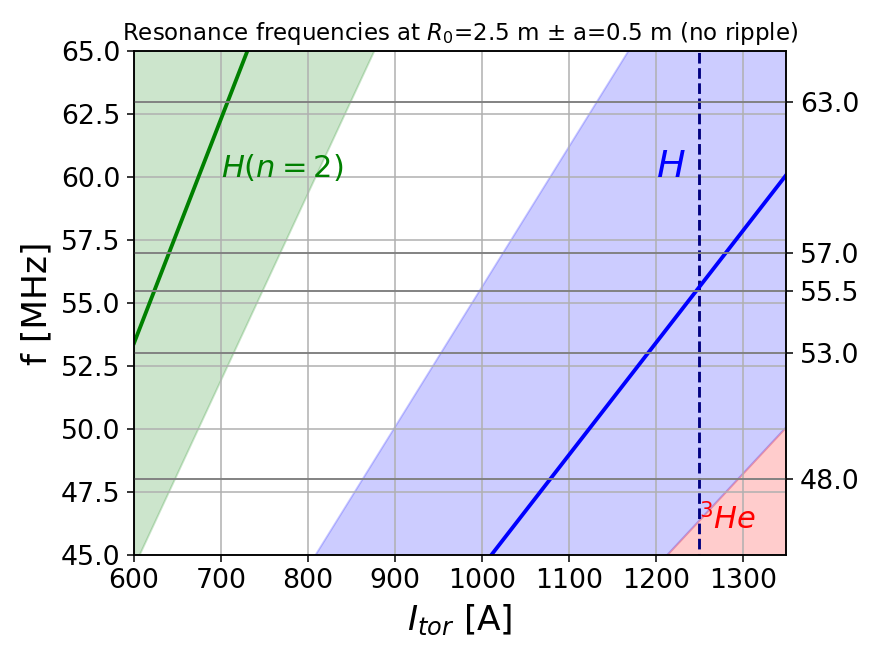

In [5]:
fig, ax = plt.subplots()
# 1H
ax.fill_between(Itors, f_cis_1H[0,:], f_cis_1H[2,:], alpha=0.2, color='b')
ax.plot(Itors, f_cis_1H[1,:], lw=2, color='b')
ax.text(1200, 60, '$H$', color='b', fontsize=20)

# 2H
ax.fill_between(Itors, f_cis_H2[0,:], f_cis_H2[2,:], alpha=0.2, color='g')
ax.plot(Itors, f_cis_H2[1,:], lw=2, color='g')
ax.text(700, 60, '$H(n=2)$', color='g', fontsize=16)

# 2He3
ax.fill_between(Itors, f_cis_He3[0,:], f_cis_He3[2,:], alpha=0.2, color='r')
ax.plot(Itors, f_cis_He3[1,:], lw=2, color='r')
ax.text(1250, 46, '$^3He$', color='r', fontsize=16)

ax.set_xlabel('$I_{tor}$ [A]', fontsize=18)
ax.set_ylabel('f [MHz]', fontsize=18)
ax.set_ylim(45, 65)
ax.set_xlim(600, 1350)
ax.grid(True)
ax.set_title(f'Resonance frequencies at $R_0$={R0} m $\pm$ a={a} m (no ripple)')

# RF Generator frequencies
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(source_frequencies)
ax2.grid(True, color='gray', linestyle='-', linewidth=1)
ax.vlines(1250, 35, 85, linestyles='--', color='navy')

ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.tight_layout()

plt.savefig('WEST_ICRH_fci_vs_Itor.png')